# **Paper Plots**
___

## Example Light Curves

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"
%config InlineBackend.figure_format = 'retina'

DATA_DIR = 'csp_data'
OUT_DIR = 'paper_plots'

In [7]:
def extract_data(sn_name):
    """Extracts the SN data into a dictionary.
    
    Parameters
    ==========
    sn_name: str
        Name of the SN to extract.
        
    Returns
    =======
    sn_dict: dict
        Dictionary with keys: `mjd`, `mag`, `err`.
    sn_info: list
        Extra info: `sn_name`, `z`, `ra`, `dec`.
    """
    
    sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
    
    sn_dict = {}
    with open(sn_file, 'r') as data_file:
        sn_info = data_file.readline().split()  # header

        for line in data_file.readlines():
            if 'filter' in line:
                filt = line.split()[-1]
                sn_dict[filt] = {'mjd':[],
                                 'mag':[],
                                 'err':[],
                                }
            else:
                mjd, mag, err = line.split()
                sn_dict[filt]['mjd'].append(float(mjd))
                sn_dict[filt]['mag'].append(float(mag))
                sn_dict[filt]['err'].append(float(err))
                
    # turn lists into arrays
    for filt in sn_dict.keys():
        filt_dict = sn_dict[filt]
        for key in filt_dict.keys():
            sn_dict[filt][key] = np.array(sn_dict[filt][key])
            
    return sn_dict, sn_info

In [12]:
def plot_sn(sn_name, save=False):
    """Plots the SN data.
    
    Parameters
    ==========
    sn_name: str
        Name of the SN to extract.
    save: bool
        If `True`, the output plot is saved.
    """
    sn_dict, sn_info = extract_data(sn_name)
    
    opt_filts = {'u':['s', 'purple', 1.0], 
                 'B':['o', 'blue', 0.6], 
                 'g':['d', 'darkgreen', 0.2], 
                 'V':['p', 'limegreen', -0.2], 
                 'r':['v', 'red', -0.6], 
                 'i':['h', 'orange', -1.4]}
    NIR_filts = {'Y':['s', 'yellow', -0.5], 
                 'J':['o', 'darkorange', 0.0], 
                 'H':['d', 'olive', 0.5], 
                 'K':['p', 'firebrick', 1.0]}

    filts = opt_filts.copy()
    filts.update(NIR_filts)

    fig, axes = plt.subplots(1, 2, figsize=(10, 6), 
                                     sharey=True, gridspec_kw={'wspace':0})

    for filt, plot_args in filts.items():
        if filt in sn_dict.keys():
            filt_data = sn_dict[filt]
            mjd, mag, err = filt_data['mjd'], filt_data['mag'], filt_data['err']

            if filt in opt_filts.keys():
                ax = axes[0]
            else:
                ax = axes[1]

            marker, color, offset = plot_args
            if offset<0.0:
                label = filt + f'$-${str(offset)[1:]}'
            else:
                label = filt + f'$+${str(offset)}'
            ax.errorbar(mjd, mag+offset, yerr=err, label=label,
                       ms=10, fmt=marker+'--', color=color, mec='k')

    for ax in axes:
        ax.set_xlabel('Modified Julian Date', fontsize=16)
        ax.tick_params(labelsize=16)
        ax.legend(fontsize=12)

    axes[0].set_ylabel('Apparent Magnitude', fontsize=16)
    ax.invert_yaxis()
    fig.suptitle(sn_name, fontsize=22)
    if save:
        plt.tight_layout()
        output = os.path.join(OUT_DIR, sn_name+'.jpg')
        plt.savefig(output)
    plt.show()

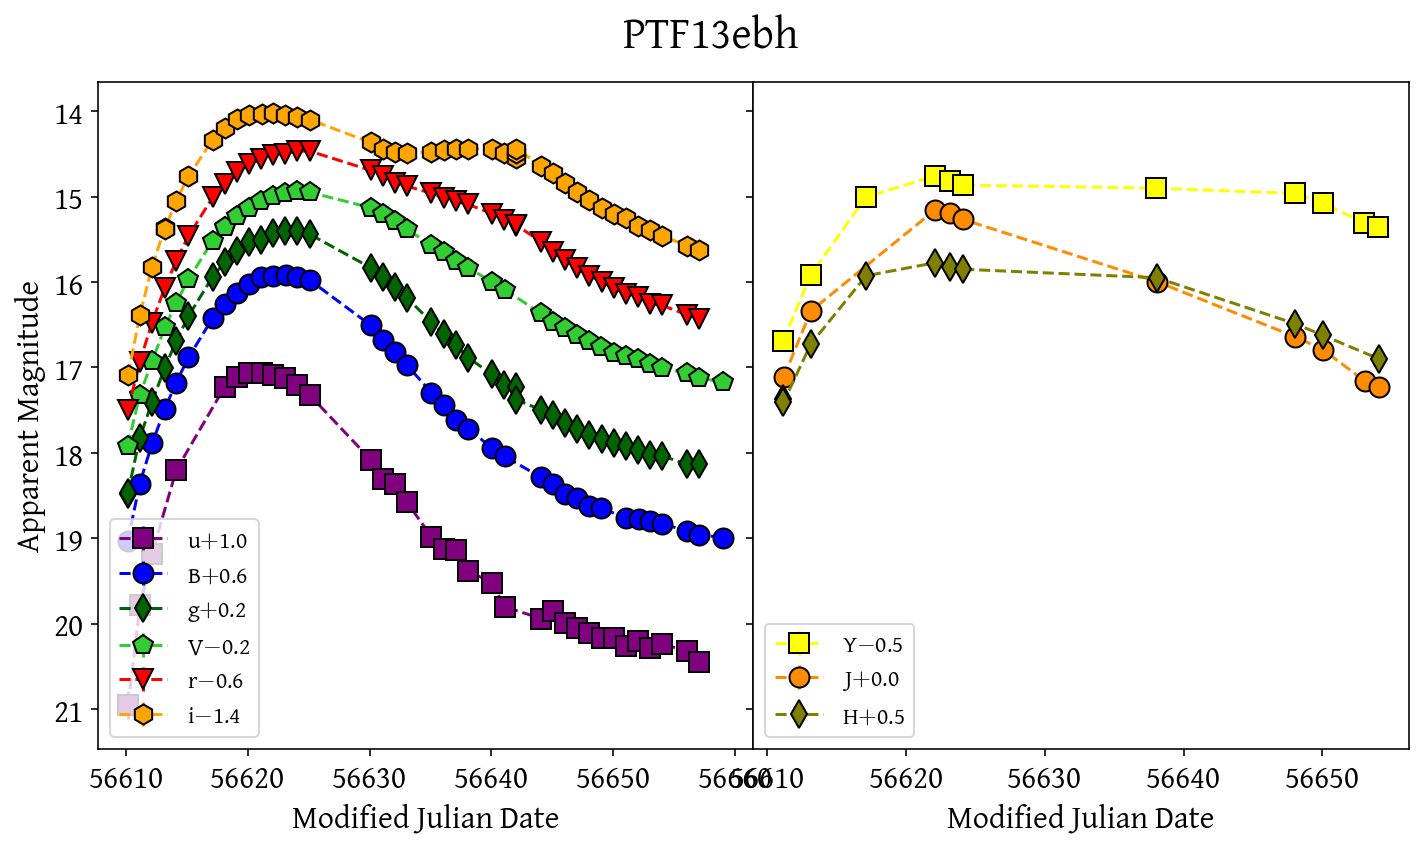

In [14]:
sn_name = 'PTF13ebh'
plot_sn(sn_name, True)

___
## Simulations Plots